# Exploratory Data Analysis
In this notebook, I have performed Exploratory Data Analysis on the dataset.

## Table of Contents:
1. Data Loading
2. Hypotheses
    - Binary Variables
    - Numeric Variables
3. Data Exploration
    - Univariate Analysis
        - Dichotomous Variables
            - Column: is_tv_subscriber
            - Column: is_movie_package_subscriber
        - Numeric Variables
            - Column: subcription_age
            - Column: bill_avg
            - Column: remaining_contract
            - Column: service_failure_count
            - Column: download_avg
            - Column: upload_avg
            - Column: download_over_limit
    - Bi-variate Analysis
        - Categorical Variables vs Target
            - is_tv_subscriber vs churn
            - is_movie_package_subscriber vs churn
        - Numerical Variables vs Target
            - subscription_age vs churn
            - bill_avg vs churn
            - remaining_contract vs churn
            - service_failure_count vs churn
            - download_avg vs churn
            - upload_avg vs churn
            - download_over_limit vs churn
        - Relationship Between Predictors
        - Correlation Matrix

In [1]:
# Importing required libraries and modules
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Setting seaborn figure size
sns.set(rc={'figure.figsize':(10,8)})

## Data Loading

In [3]:
train = pd.read_csv('../data/interim/train.csv')

In [4]:
print('Shape=>', train.shape)
train.head()

Shape=> (62274, 11)


,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,1250624,1,1,1.77,7,0.19,0,114.1,8.7,0,0
1,1668176,1,0,0.05,6,0.59,0,12.7,1.3,0,0
2,1151155,0,0,1.42,18,NaN,0,0.4,0.0,0,1
3,1219428,1,0,0.73,20,0.00,0,9.3,0.4,0,1
4,1344910,1,0,0.25,17,0.00,0,6.1,0.5,0,1


Our training set has 11 columns and 62274 rows. Now that we know what each of the variables mean, let's build some hypoythesis for our predictors for performing exploration data analysis.

## Hypotheses
### Binary Variables
1. **is_tv_subscriber:** A person having a TV subscription must have paid extra and is less likely to churn.
2. **is_movie_package_subscriber:** Similar to a TV subscription, a person having a Cinema Movie subscription is also less likely to churn.

### Numeric Variables
1. **subscription_age:** 
- If a customer has been using the service for a long time, then he/she must be satisfied with it and hence, they're less likely to make a switch.
- Generally, if someone buys an internet subscription, then they use it for some time(at least a few months) and then they decide to make a switch. This means that newer customers are also less likely to churn.
2. **bill_avg:** 
- People who have zero average bill amount in the last 3 months have higher chances to switch to another ISP. It can also be the case that they have already made a switch.
- Internet subscription prices usually increase by a small amount after some time. People who pay less amount have a tight budget and hence, have a higher possibility of switching to other ISPs. On the other hand, people paying medium to large bills must have high income and hence they're less affected by the increments.
3. **remaining_contract:**
- Larger the time left for the contract to end, the lesser should be the chances to churn.
- If a customer is not in contract, then there is a higher chances of making a switch.
4. **service_failure_count:** Higher the number of calls made to the call centre regarding the service failures, the higher will be the chances of a customer being frustrated and hence, he/she is more likely to switch to a different ISP.
5. **download_avg:** The probability of a customer churning should not depend highly on the average downloads because we don't have the temporal component attached to this variable. This means we can't observe the dips and rises in the usage and derive insights from it. Also, some customers, in general, have high internet demands and hence they have high internet usage. So, we can't really say if high usage means a person is not going to churn.
6. **upload_avg:** Similar to *download_avg*.
7. **download_over_limit:** Similar to *download_avg* and *upload_avg*.

## Data Exploration

In [5]:
# Getting an overview of the dataset
train.info(show_counts=True,verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62274 entries, 0 to 62273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           62274 non-null  int64  
 1   is_tv_subscriber             62274 non-null  int64  
 2   is_movie_package_subscriber  62274 non-null  int64  
 3   subscription_age             62274 non-null  float64
 4   bill_avg                     62274 non-null  int64  
 5   remaining_contract           43701 non-null  float64
 6   service_failure_count        62274 non-null  int64  
 7   download_avg                 61949 non-null  float64
 8   upload_avg                   61949 non-null  float64
 9   download_over_limit          62274 non-null  int64  
 10  churn                        62274 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 5.2 MB


Among these 11 columns, **id** is an identifier variable and contains no information for predicting churn. Therefore, I'll drop it.

In [6]:
train.drop(columns=['id'], inplace=True)

In [7]:
train.describe()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
count,62274.000000,62274.000000,62274.000000,62274.000000,43701.000000,62274.000000,61949.000000,61949.000000,62274.000000,62274.000000
mean,0.816344,0.334265,2.453485,18.943781,0.714611,0.275958,43.704287,4.185977,0.208080,0.554148
std,0.387207,0.471737,2.038194,13.263691,0.696947,0.823169,64.417559,9.801698,0.997159,0.497063
min,0.000000,0.000000,-0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.930000,13.000000,0.000000,0.000000,6.700000,0.500000,0.000000,0.000000
50%,1.000000,0.000000,1.980000,19.000000,0.570000,0.000000,27.700000,2.100000,0.000000,1.000000
75%,1.000000,1.000000,3.300000,22.000000,1.310000,0.000000,60.400000,4.800000,0.000000,1.000000
max,1.000000,1.000000,12.800000,406.000000,2.870000,19.000000,4415.200000,453.300000,7.000000,1.000000


The minimum value of *subscription_age* is -0.02 which isn't possible. So, let's take a look at the instances with less than 0 subscription age.

In [8]:
train[train['subscription_age']<0]

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
44192,0,0,-0.02,0,0.08,0,32.6,1.3,0,1


Since we only have a single instance, we can simply remove it from our dataset.

In [9]:
# Removing instances with subscription_age less than 0
train = train[~(train['subscription_age']<0)]

Let's now take a look at the number of missing values in every column.

In [10]:
train.isnull().sum()

is_tv_subscriber                   0
is_movie_package_subscriber        0
subscription_age                   0
bill_avg                           0
remaining_contract             18573
service_failure_count              0
download_avg                     325
upload_avg                       325
download_over_limit                0
churn                              0
dtype: int64

We have a lot of missing values in *remaining_contract* column and few missing values in the *download_avg* and *upload_avg* column. We'll analyze them later.

### Univariate Analysis

#### Dichotomous Variables

##### Column: is_tv_subscriber

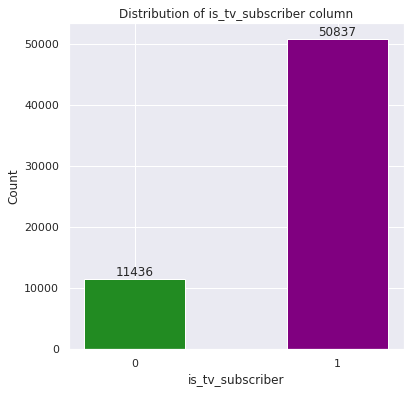

In [11]:
# Visualizing Distribution of is_tv_subscriber column
fig=plt.figure(figsize=(6,6))

tv_subs_value_counts = train['is_tv_subscriber'].value_counts()

graph=plt.bar(tv_subs_value_counts.index,
              tv_subs_value_counts,
              color=['purple','forestgreen'],
              width=0.5)

plt.xticks(tv_subs_value_counts.index)
plt.title('Distribution of is_tv_subscriber column')
plt.xlabel('is_tv_subscriber')
plt.ylabel('Count')

for bar, c in zip(graph, tv_subs_value_counts):
    plt.text(bar.get_x() + bar.get_width()/2.0, 
             bar.get_height(), c, ha='center', va='bottom')

plt.show()

There is a higher number of customers who have a TV subscription than those who don't.

##### Column: is_movie_package_subscriber

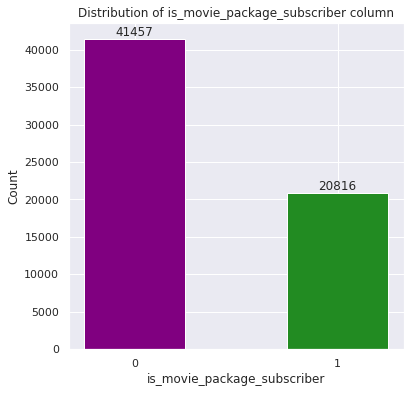

In [12]:
# Visualizing Distribution of is_movie_package_subscriber column
fig=plt.figure(figsize=(6,6))

movie_subs_value_counts = train['is_movie_package_subscriber'].value_counts()

graph=plt.bar(movie_subs_value_counts.index,
              movie_subs_value_counts,
              color=['purple','forestgreen'],
              width=0.5)

plt.xticks(movie_subs_value_counts.index)
plt.title('Distribution of is_movie_package_subscriber column')
plt.xlabel('is_movie_package_subscriber')
plt.ylabel('Count')

for bar, c in zip(graph, movie_subs_value_counts):
    plt.text(bar.get_x() + bar.get_width()/2.0, 
             bar.get_height(), c, ha='center', va='bottom')

plt.show()

There is a lesser number of customers who have a Cinema Movie subscription than those who don't.

#### Numeric Variables

##### Column: subscription_age

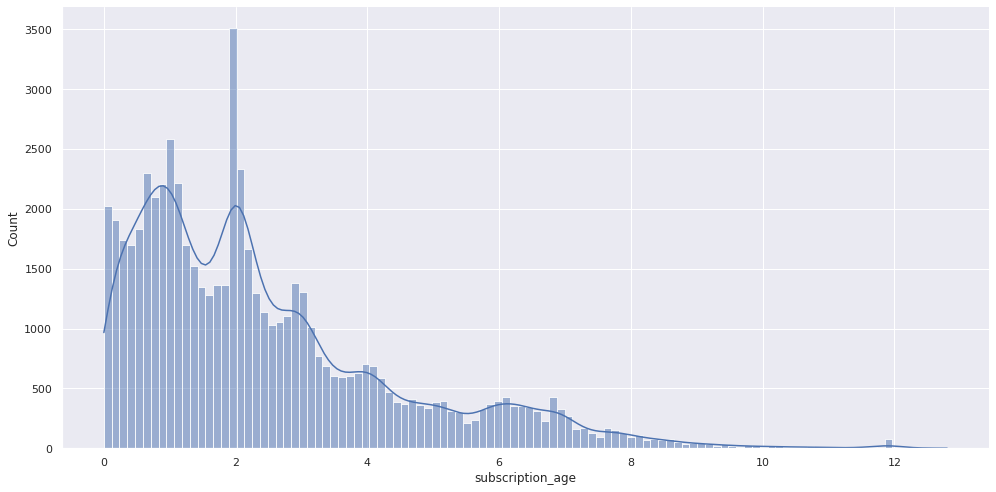

In [13]:
# Visualizing Histogram of subscription_age column
sns.displot(data=train['subscription_age'], height=7, aspect=2, kde=True)

In [14]:
# Visualizing percentiles of subscription_age column
train['subscription_age'].describe(percentiles=[0.1*i for i in range(1,10)])

count    62273.000000
mean         2.453525
std          2.038187
min          0.000000
10%          0.400000
20%          0.764000
30%          1.080000
40%          1.520000
50%          1.980000
60%          2.320000
70%          2.960000
80%          3.900000
90%          5.680000
max         12.800000
Name: subscription_age, dtype: float64

50% of customers are less than 2 years old and only 10% customers are more than 6 years old.

##### Column: bill_avg

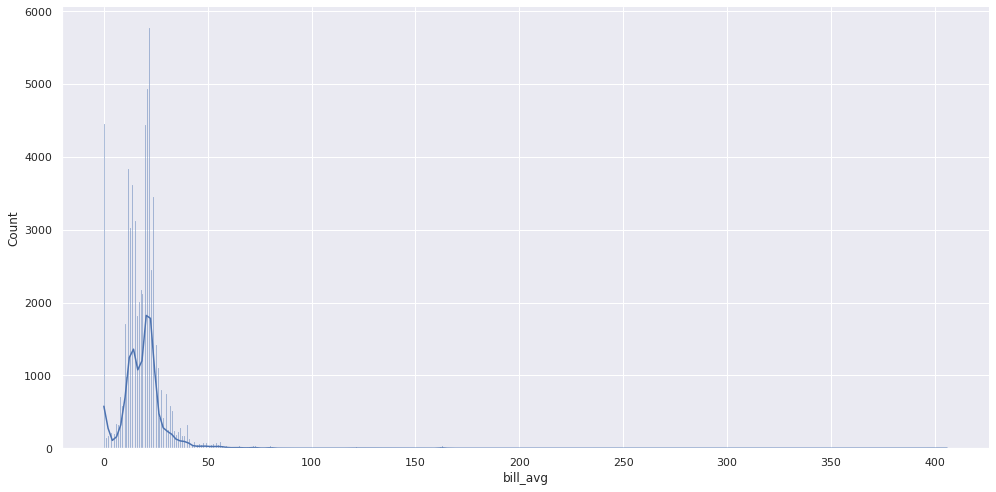

In [15]:
# Visualizing Histogram of bill_avg column
sns.displot(data=train['bill_avg'], height=7, aspect=2, kde=True)

The distribution of the *bill_avg* column is bimodal that means there are two types of groups present in this data. One reason could be that people who are in-contract have to pay lesser monthly bills than those who are not in any contract.

In [16]:
# Visualizing percentiles of bill_avg column
train['bill_avg'].describe(percentiles=[0.1*i for i in range(1,10)])

count    62273.000000
mean        18.944085
std         13.263580
min          0.000000
10%          8.000000
20%         12.000000
30%         14.000000
40%         16.000000
50%         19.000000
60%         21.000000
70%         22.000000
80%         24.000000
90%         28.000000
max        406.000000
Name: bill_avg, dtype: float64

##### Column: remaining_contract

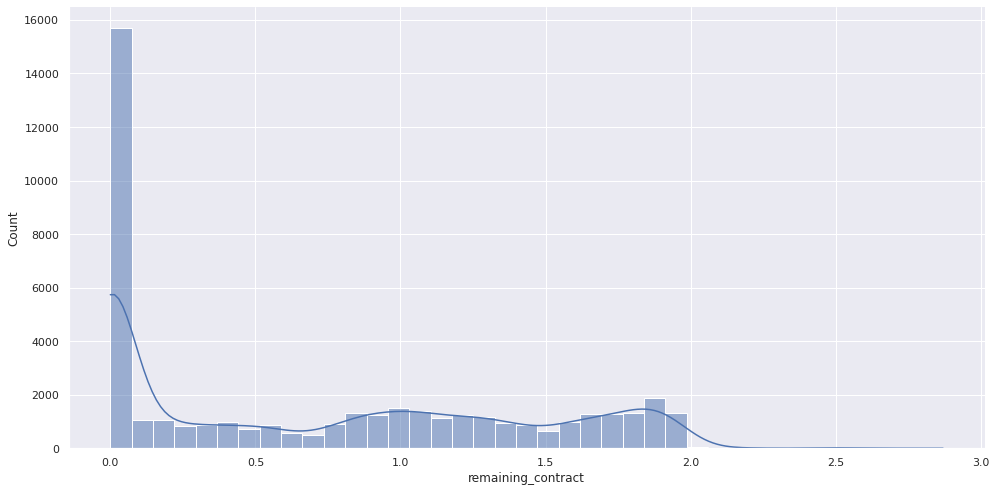

In [17]:
# Visualizing Histogram of remaining_contract column
sns.displot(data=train['remaining_contract'], height=7, aspect=2, kde=True)

In [18]:
# Visualizing percentiles of remaining_contract column
train['remaining_contract'].describe(percentiles=[0.1*i for i in range(1,10)])

count    43700.000000
mean         0.714626
std          0.696948
min          0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.200000
50%          0.570000
60%          0.930000
70%          1.170000
80%          1.490000
90%          1.790000
max          2.870000
Name: remaining_contract, dtype: float64

Around 60% customers are in a contract of less than a year.

##### Column: service_failure_count

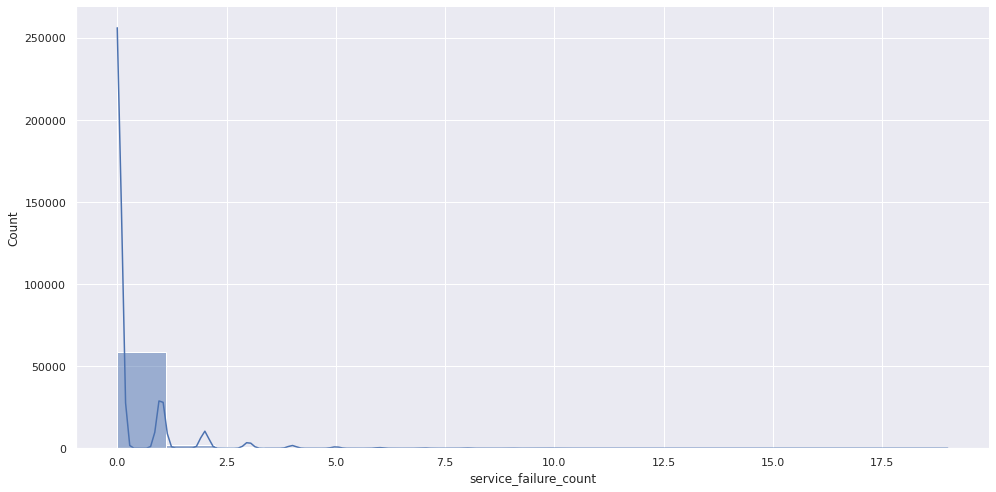

In [19]:
# Visualizing Histogram of service_failure_count column
sns.displot(data=train['service_failure_count'], height=7, aspect=2, kde=True)

In [20]:
# Visualizing percentiles of service_failure_count column
train['service_failure_count'].describe(percentiles=[0.1*i for i in range(1,10)])

count    62273.000000
mean         0.275962
std          0.823175
min          0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.000000
90%          1.000000
max         19.000000
Name: service_failure_count, dtype: float64

80% of the customers didn't call the call centre, 10% called once, and the remaining 10% called more than once.

##### Column: download_avg

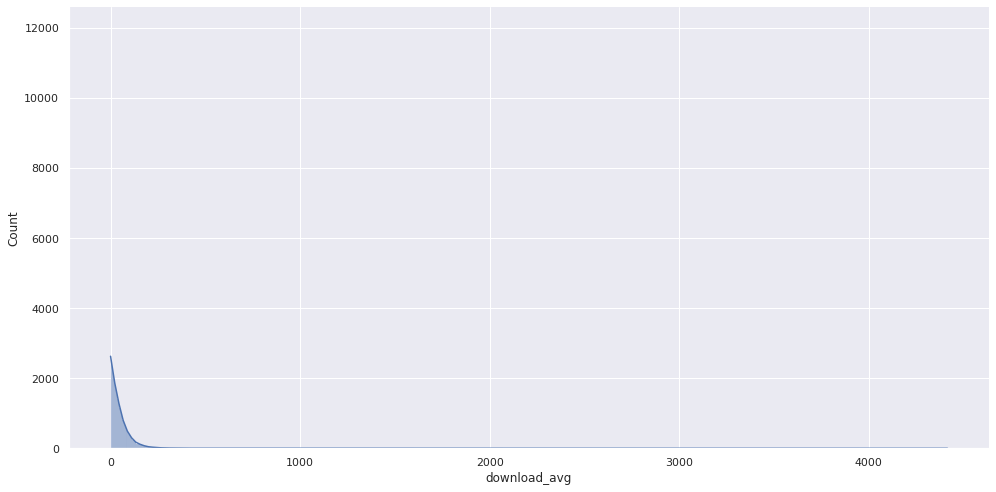

In [21]:
# Visualizing Histogram of download_avg column
sns.displot(data=train['download_avg'], height=7, aspect=2, kde=True)

In [22]:
# Visualizing percentiles of download_avg column
train['download_avg'].describe(percentiles=[0.1*i for i in range(1,10)])

count    61948.000000
mean        43.704467
std         64.418063
min          0.000000
10%          0.000000
20%          3.100000
30%         10.400000
40%         18.500000
50%         27.700000
60%         38.600000
70%         52.000000
80%         71.000000
90%        103.700000
max       4415.200000
Name: download_avg, dtype: float64

##### Column: upload_avg

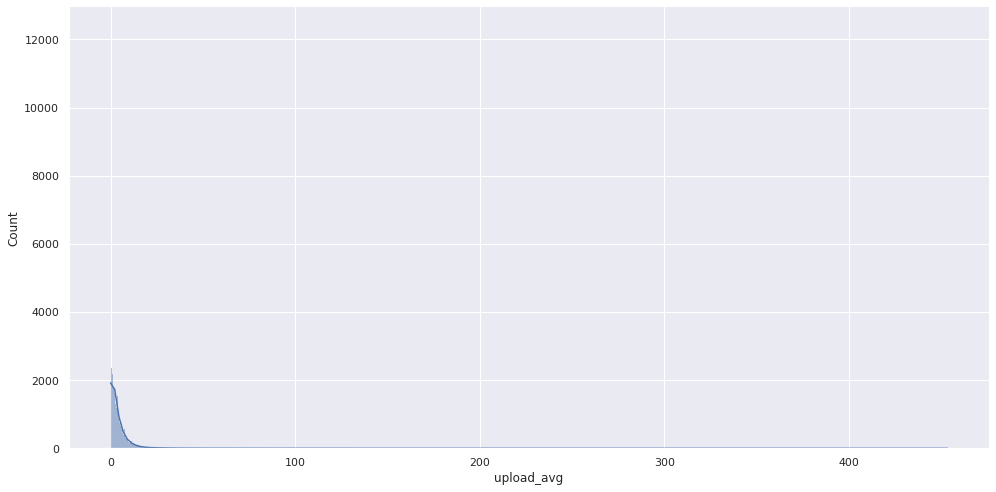

In [23]:
# Visualizing Histogram of upload_avg column
sns.displot(data=train['upload_avg'], height=7, aspect=2, kde=True)

In [24]:
# Visualizing percentiles of upload_avg column
train['upload_avg'].describe(percentiles=[0.1*i for i in range(1,10)])

count    61948.000000
mean         4.186024
std          9.801770
min          0.000000
10%          0.000000
20%          0.300000
30%          0.800000
40%          1.400000
50%          2.100000
60%          3.000000
70%          4.100000
80%          5.800000
90%          9.100000
max        453.300000
Name: upload_avg, dtype: float64

##### Column: download_over_limit

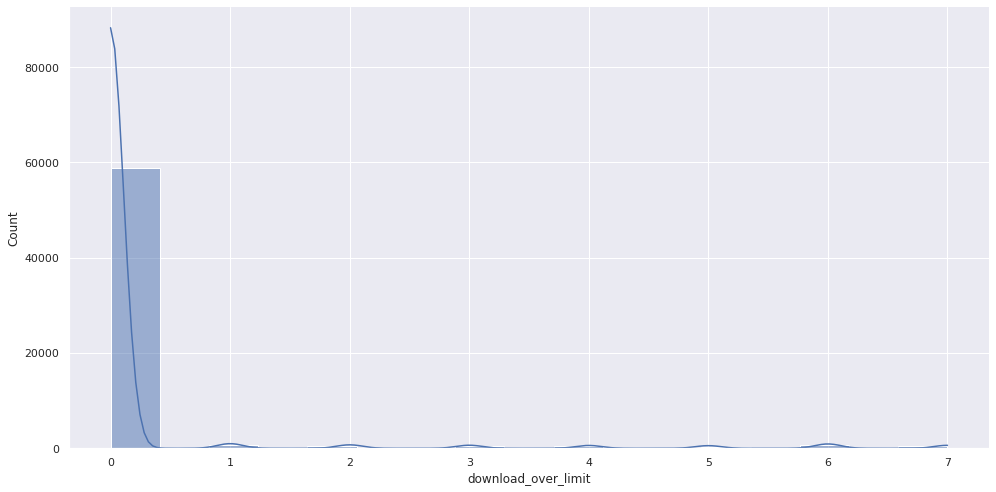

In [25]:
# Visualizing Histogram of download_over_limit column
sns.displot(data=train['download_over_limit'], height=7, aspect=2, kde=True)

In [26]:
# Visualizing percentiles of download_over_limit column
train['download_over_limit'].describe(percentiles=[0.1*i for i in range(1,10)])

count    62273.000000
mean         0.208084
std          0.997167
min          0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.000000
90%          0.000000
max          7.000000
Name: download_over_limit, dtype: float64

More than 90% of customers have not crossed their download limit.

In [27]:
train['download_over_limit'].value_counts()

0    58906
1      652
6      610
2      486
3      430
7      419
4      399
5      371
Name: download_over_limit, dtype: int64

### Bi-variate Analysis

#### Categorical Variables vs Target

##### is_tv_subscriber vs churn

In [28]:
pd.crosstab(train['is_tv_subscriber'], train['churn'])

churn,0,1
is_tv_subscriber,,
0,1196,10240
1,26569,24268


The number of customers churning and not churning is roughly the same for TV subscribers, but it varies a lot for those who don't have a TV subscription. It means the customer who doesn't have an active TV subscription is more likely to churn and the chances to churn for the customers who are also TV subscribers depends on some other factors.

##### is_movie_package_subscriber vs churn

In [29]:
pd.crosstab(train['is_movie_package_subscriber'], train['churn'])

churn,0,1
is_movie_package_subscriber,,
0,14023,27434
1,13742,7074


A customer having a movie package subscription is less likely to churn, and those who don't are more likely to churn.

#### Numerical Variables vs Target

##### subscription_age vs churn

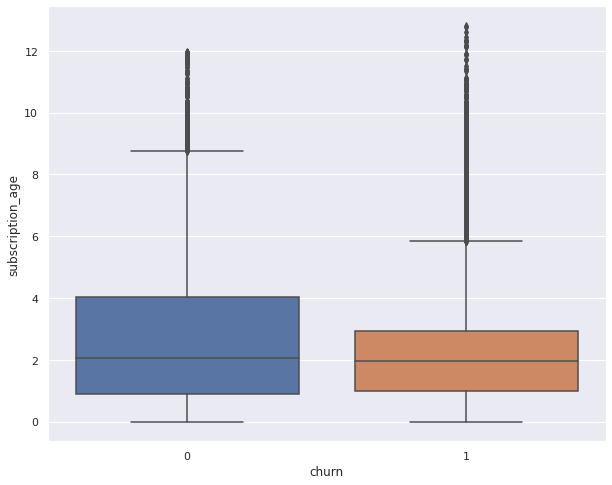

In [30]:
sns.boxplot(data=train, x='churn', y='subscription_age')
plt.show()

The distribution of *subscription_age* for the people who didn't churn is more positively skewed than people who churned. The median of both of the boxplots is the same. This means the chance of a customer churning doesn't depend much on the *subscription_age*.

##### bill_avg vs churn

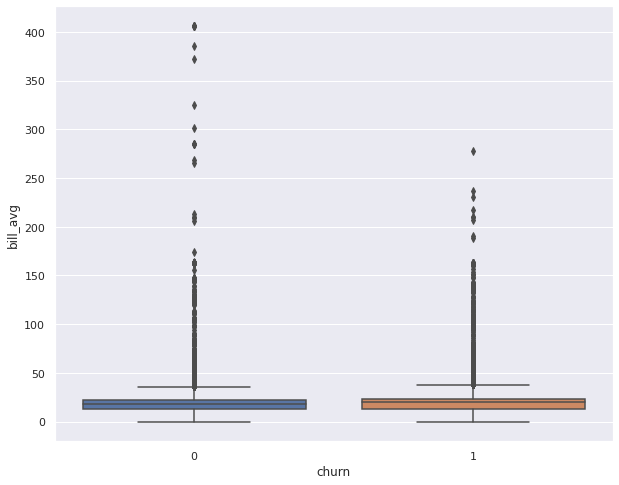

In [31]:
sns.boxplot(data=train, x='churn', y='bill_avg')
plt.show()

The outliers present in both the groups are not letting us see the boxplots clearly. So, let's remove them from the visualization.

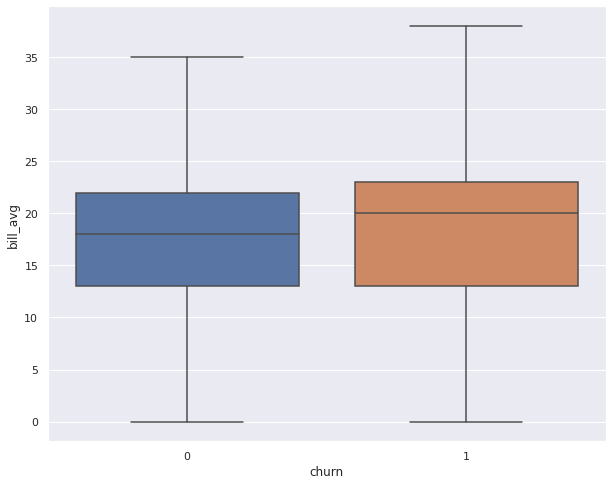

In [32]:
sns.boxplot(data=train, x='churn', y='bill_avg', showfliers=False)
plt.show()

Both distributions look roughly the same, except people who churned paid slightly higher bills in the past 3 months than those who didn't. One reason for this could be that people who didn't churn were in a contract and hence paid slightly lower average bills, whereas people who paid monthly were paying higher amounts, and since they weren't in any contract it was easier for them to make a switch. It means the chance of a customer churning doesn't depend on the *bill_avg*.

##### remaining_contract vs churn

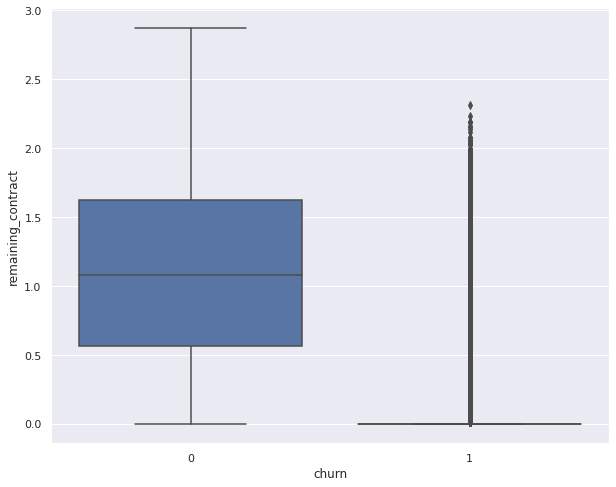

In [33]:
sns.boxplot(data=train, x='churn', y='remaining_contract')
plt.show()

We can clearly see that both the distributions are very different. It means our previously made hypothesis is true that customers who have a contract are less likely to churn.

##### service_failure_count vs churn

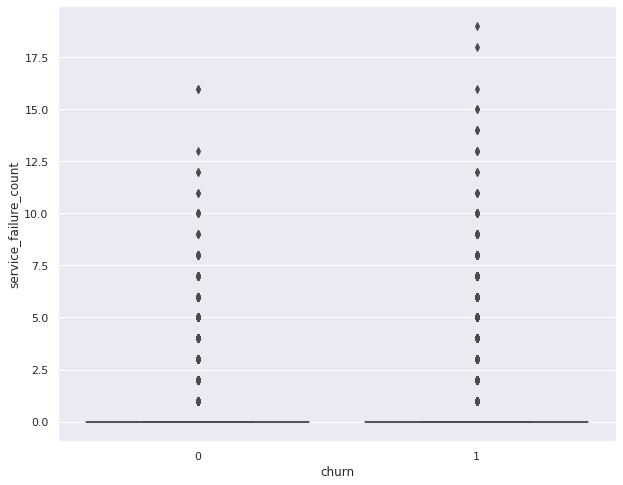

In [34]:
sns.boxplot(data=train, x='churn', y='service_failure_count')
plt.show()

The distribution of *service_failure_count* is roughly the same for both groups. It means our hypothesis is false in accordance with this data, and the number of calls made to the call centre regarding service failure does affect the possibility of a customer churning. One reason for this result could be that 80% of the customers never called the call centre.

##### download_avg vs churn

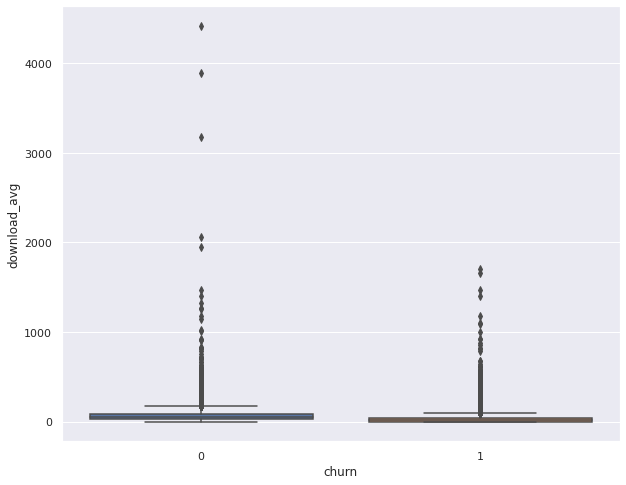

In [35]:
sns.boxplot(data=train, x='churn', y='download_avg')
plt.show()

The outliers present in both the groups are not letting us see the boxplots clearly. So, let's remove them from the visualization.

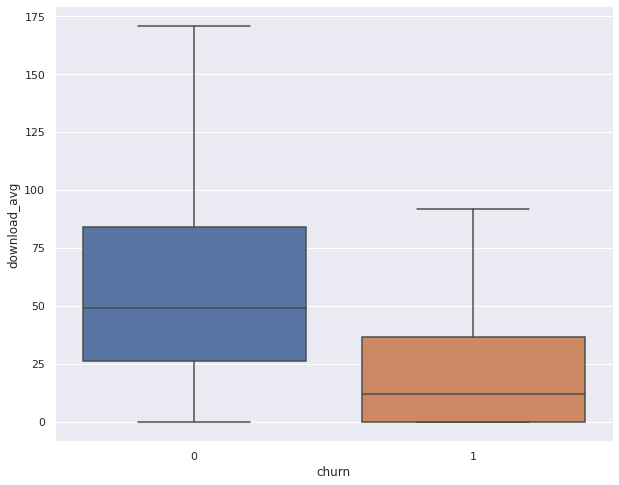

In [36]:
sns.boxplot(data=train, x='churn', y='download_avg', showfliers=False)
plt.show()

Both distributions are different. Hence, our previously made hypothesis came out to be wrong, and the chances of a customer churning depend on their average download usage in the past 3 months.

##### upload_avg vs churn

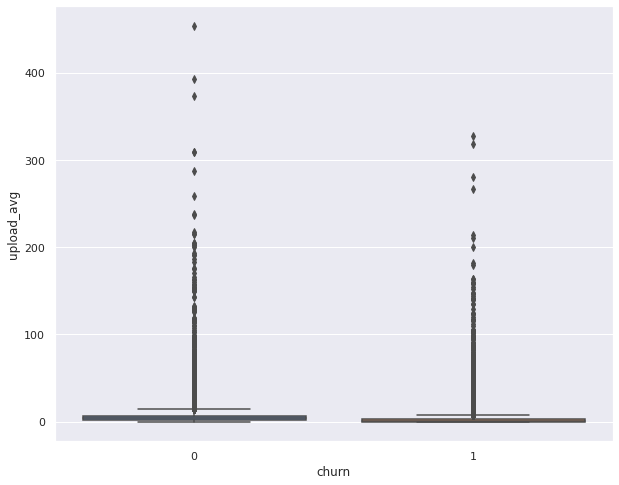

In [37]:
sns.boxplot(data=train, x='churn', y='upload_avg')
plt.show()

The outliers present in both the groups are not letting us see the boxplots clearly. So, let's remove them from the visualization.

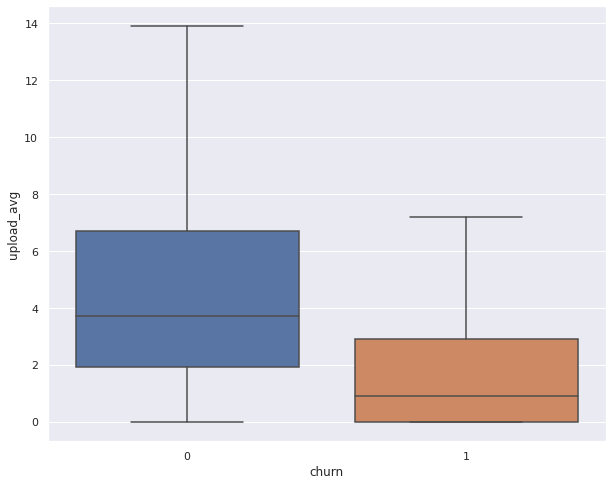

In [38]:
sns.boxplot(data=train, x='churn', y='upload_avg', showfliers=False)
plt.show()

Similar to *download_avg*, less upload usage means a customer is more likely to churn.

##### download_over_limit vs churn

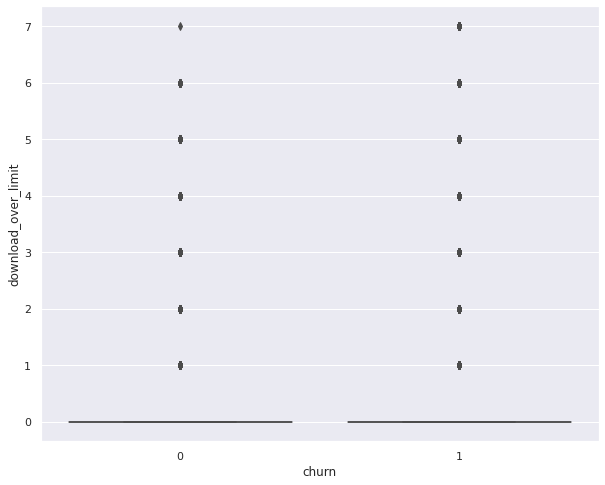

In [39]:
sns.boxplot(data=train, x='churn', y='download_over_limit')
plt.show()

Comparing boxplots of both groups didn't provide much information. Another trick we can use to explore these two variables is to use a crosstab. I know it is used for categorical variables, but can we use it here because the count of crossing download limit is at max. 7.

In [40]:
pd.crosstab(train['download_over_limit'], train['churn'])

churn,0,1
download_over_limit,,
0,27377,31529
1,173,479
2,83,403
3,47,383
4,31,368
5,30,341
6,23,587
7,1,418


Both groups had exactly similar boxplots but we can clearly see a difference in them in the crosstab. Customers who crossed their download limit have a very high chance of churning. It could be due to the fact that when a customer crosses their download limit, they have to pay extra for that.

#### Relationship Between Predictors
By far in the Bi-variate Analysis, we have analysed the relationship between predictors and the target. Now, it's time to analyze the relationship between predictors.

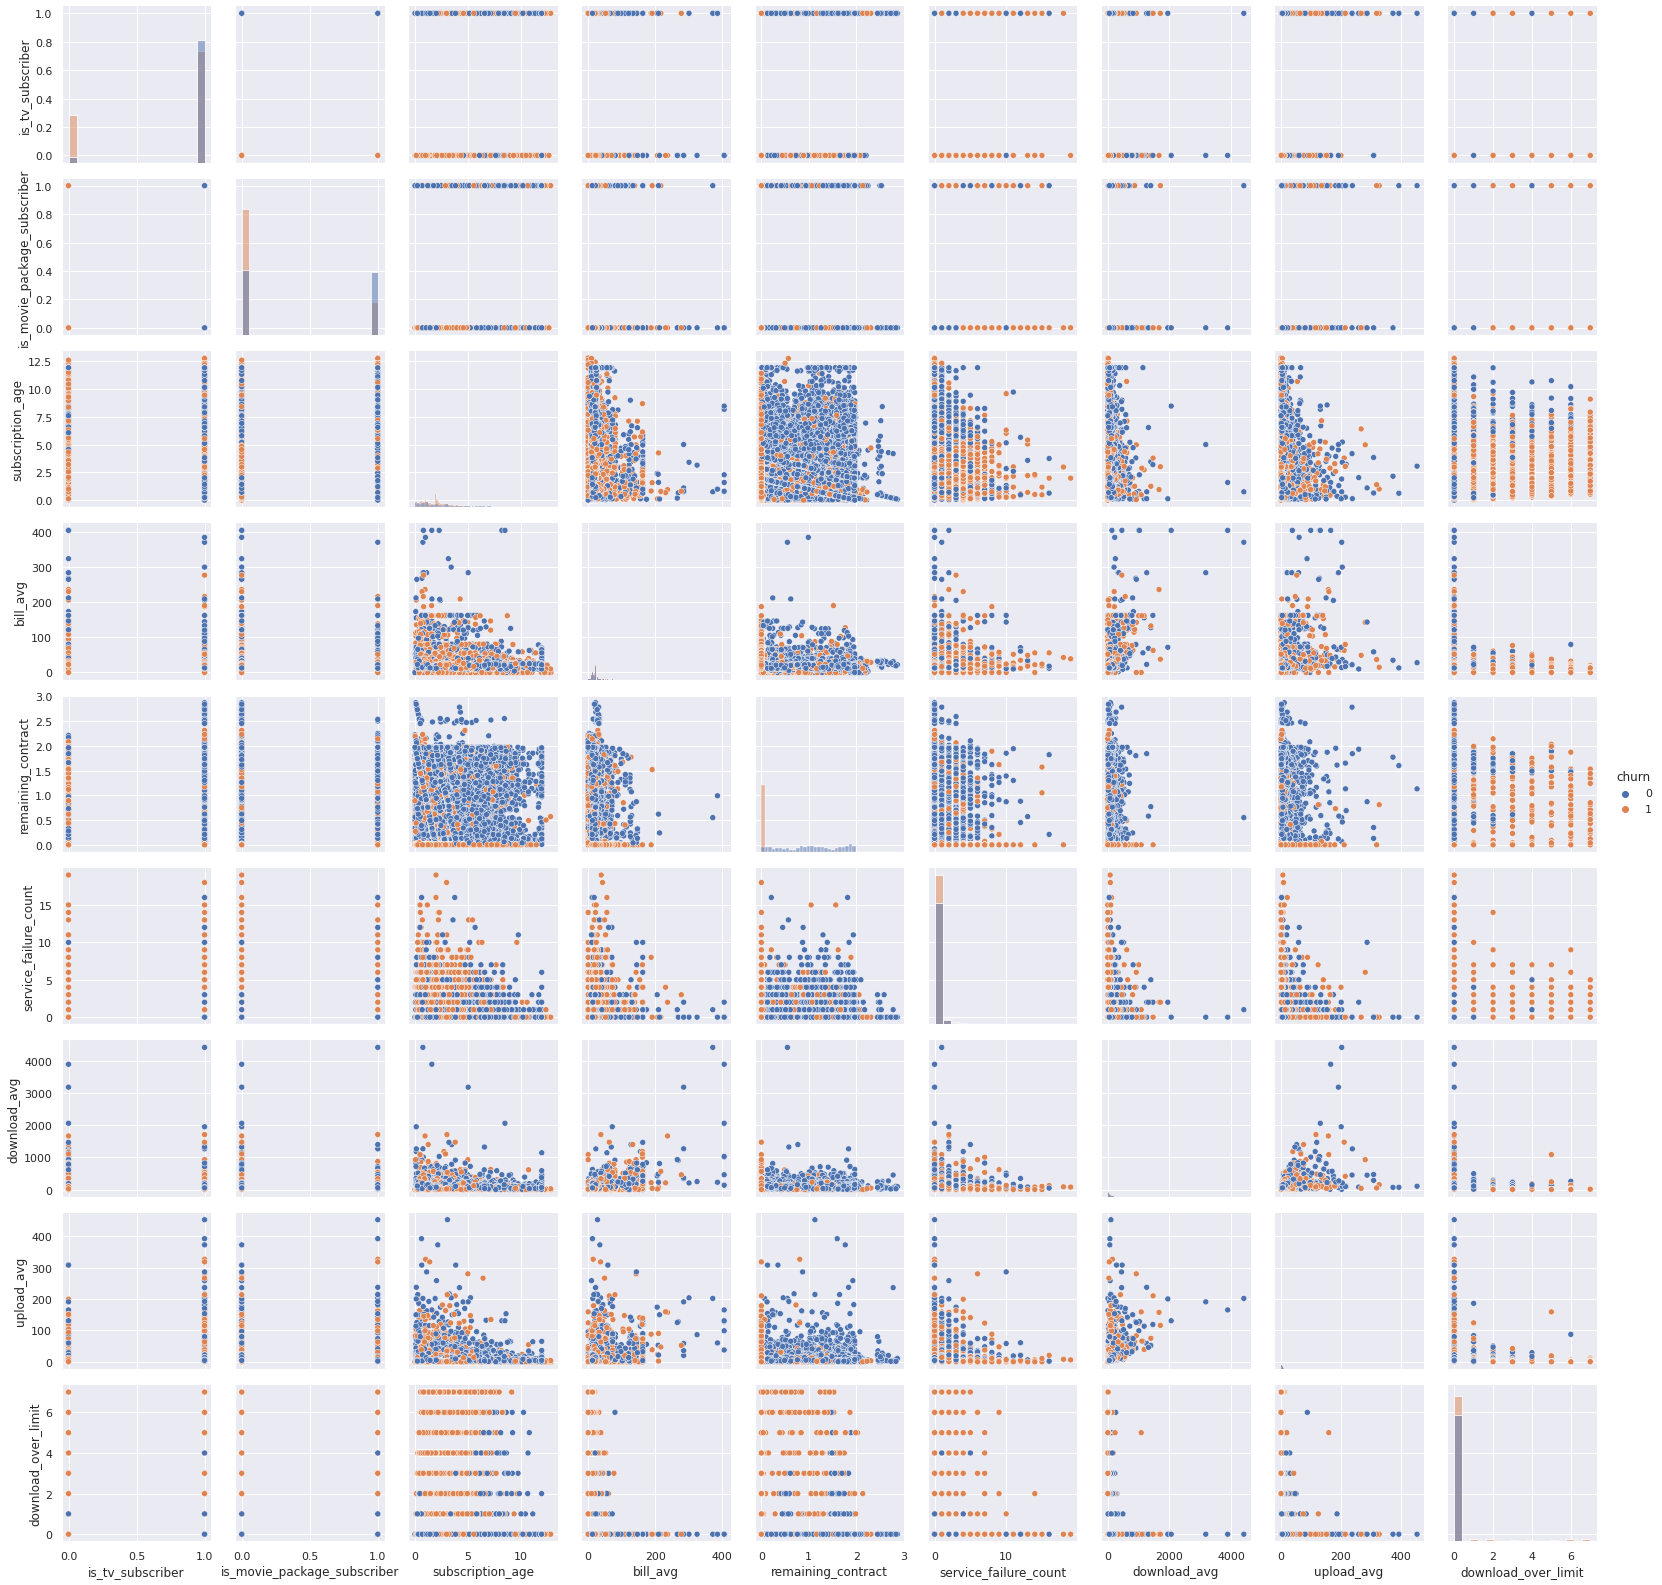

In [41]:
g=sns.PairGrid(train, hue='churn')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
plt.show()

#### Correlation Matrix
Till now, we analyzed the relationship among variables using different kinds of plots which helped us in understanding the association between variables but we still don't know about the strength of association between variables. Therefore, I'll plot the correlation matrix. The correlation matrix will also help us in checking presence of Multicollinearity in the dataset.

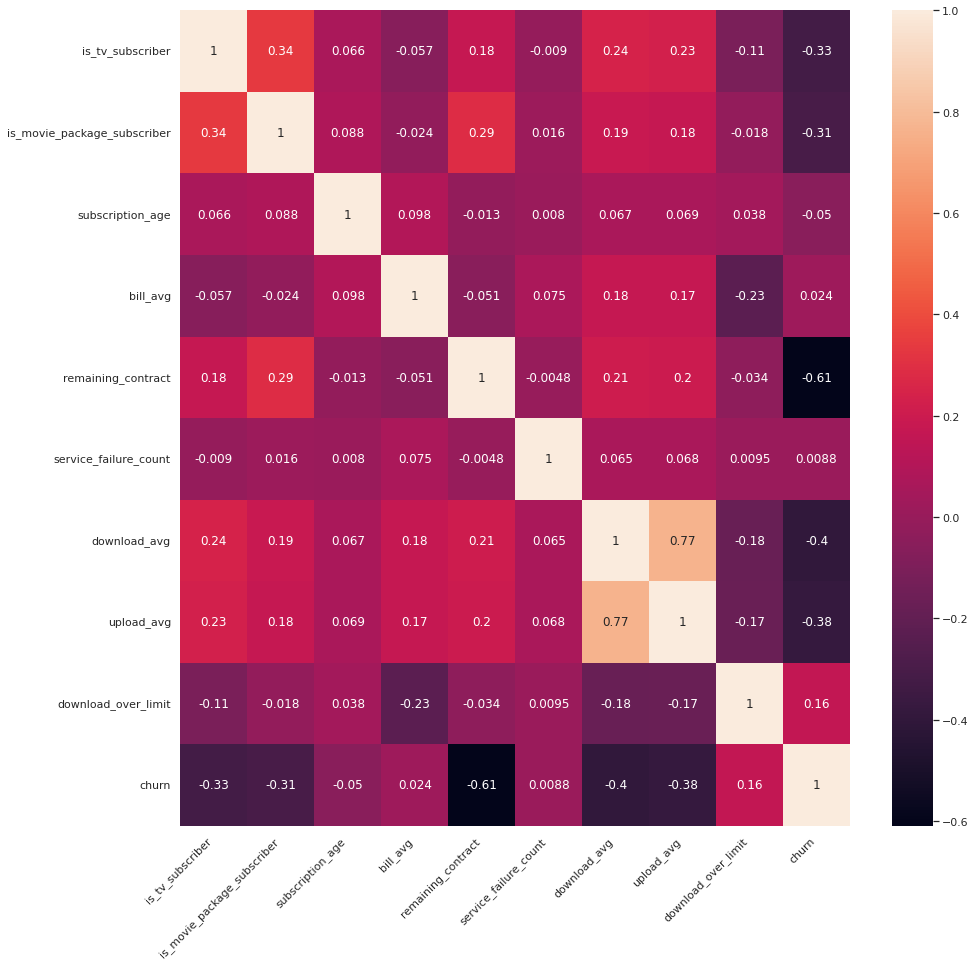

In [42]:
# Calculate the correlation matrix
corr = train.corr(method='kendall')

# Plotting heatmap
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            ax=ax,
            annot=True)

ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=45,
                   horizontalalignment='right')
plt.show()